In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Car details.csv")

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
print(f'Our Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Our Dataset has 8128 rows and 13 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [9]:
df.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
df["mileage"]=df['mileage'].apply(lambda x:x.split(' ')[0])
df["engine"]=df['engine'].apply(lambda x:x.split(' ')[0])
df["max_power"]=df['max_power'].apply(lambda x:x.split(' ')[0])
df["seats"]=df['seats'].astype(int)
df['mileage']=df['mileage'].astype(float)
df['engine']=df['engine'].astype(float)
df['max_power']=df['max_power'].astype(float)


In [11]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [12]:
df.duplicated().sum()

1189

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df['company']=df['name'].apply(lambda x:x.split(' ')[0])
try:
  df['model']=df['name'].apply(lambda x:x.split(' ')[1:])
  df['model']=df['model'].apply(lambda x:' '.join(x))
except:
  df['model']='model'

In [15]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5,Maruti,Wagon R VXI BS IV with ABS
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5,Hyundai,i20 Magna 1.4 CRDi
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5,Hyundai,i20 Magna
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,Hyundai,Verna CRDi SX


### Fuel Type

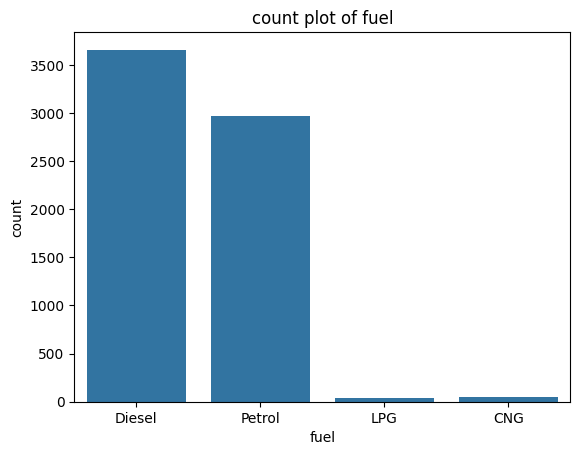

In [16]:
sns.countplot(data=df,x='fuel')
plt.title("count plot of fuel")
plt.show()

### YEAR

In [17]:
print(f'The Oldest car in our dataset is from {df["year"].min()}')
print(f'The Newest car in our dataset is from {df["year"].max()}')

The Oldest car in our dataset is from 1994
The Newest car in our dataset is from 2020


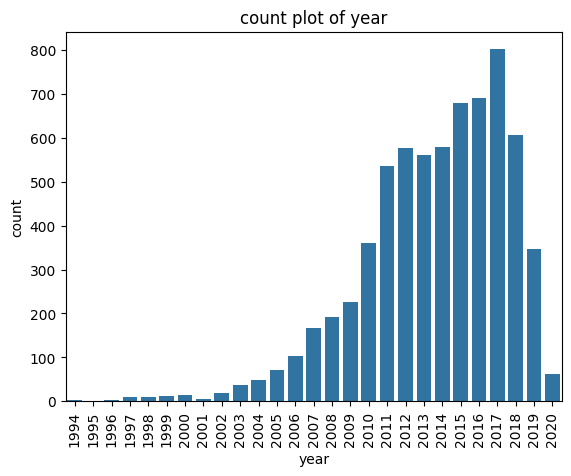

In [18]:
sns.countplot(data=df,x='year')
plt.title("count plot of year")
plt.xticks(rotation=90)
plt.show()

### In our dataset 2017 cars are the more in quantity then followed by 2016 and then 2015

### Seller Type

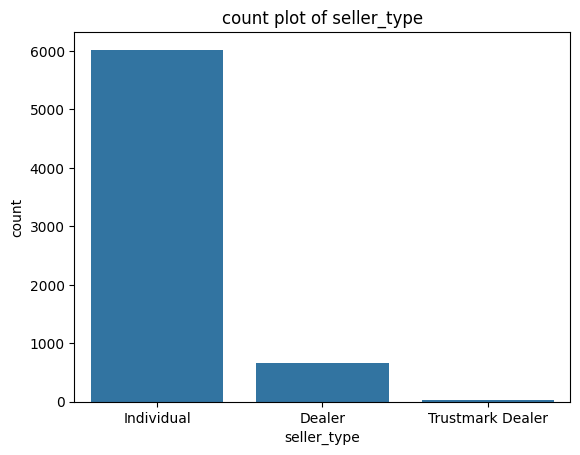

In [19]:
sns.countplot(data=df,x='seller_type')
plt.title("count plot of seller_type")
plt.show()

### Transmission

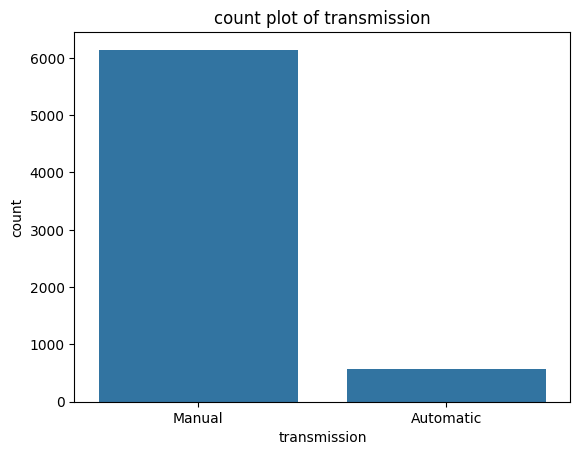

In [20]:
sns.countplot(data=df,x='transmission')
plt.title("count plot of transmission")
plt.show()

### Owner

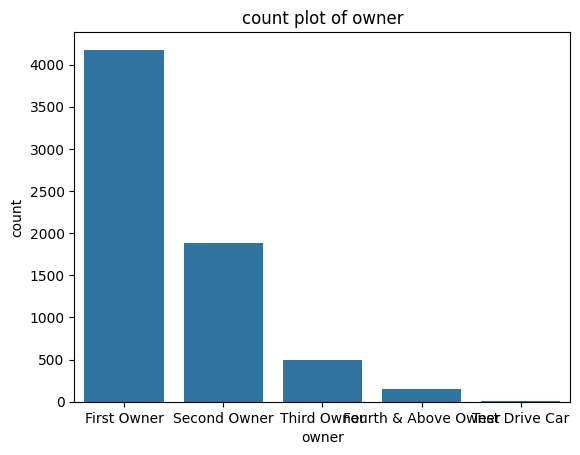

In [21]:
sns.countplot(data=df,x='owner')
plt.title("count plot of owner")
plt.show()

### Seats

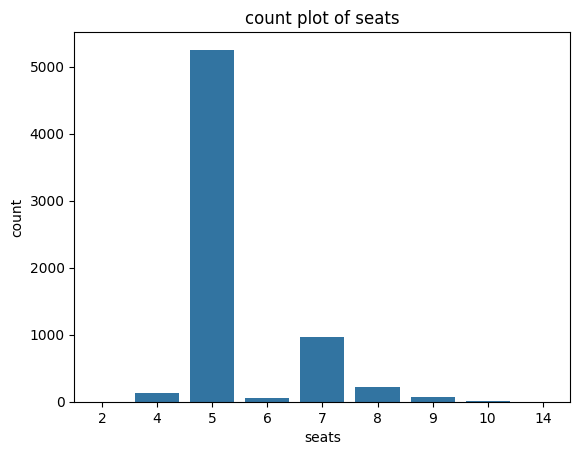

In [22]:
sns.countplot(data=df,x='seats')
plt.title("count plot of seats")
plt.show()

### Company

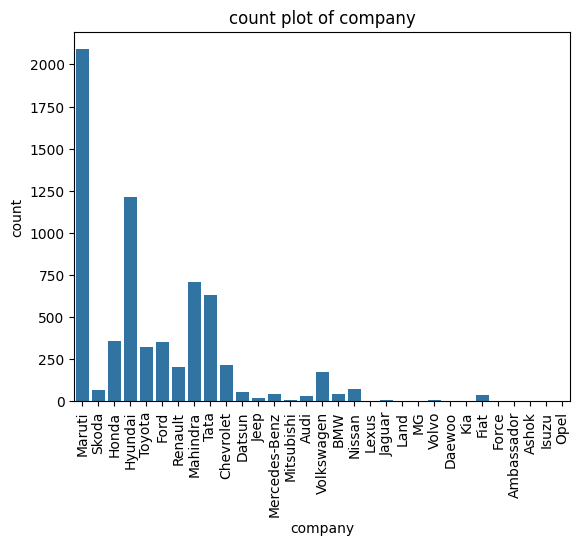

In [23]:
sns.countplot(data=df,x='company')
plt.title("count plot of company")
plt.xticks(rotation=90)
plt.show()

In [24]:
df=df.drop(columns="name")

In [25]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5,Maruti,Swift Dzire VDI
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5,Skoda,Rapid 1.5 TDI Ambition
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5,Honda,City 2017-2020 EXi
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5,Hyundai,i20 Sportz Diesel
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5,Maruti,Wagon R VXI BS IV with ABS
8122,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,219.7Nm@ 1500-2750rpm,5,Hyundai,i20 Magna 1.4 CRDi
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5,Hyundai,i20 Magna
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,Hyundai,Verna CRDi SX


In [26]:
for i in  df.columns:
  if df[i].dtype == 'object':
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])


In [27]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,company,model
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,178,5,20,1491
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,260,5,26,1235
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,66,5,10,325
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,224,5,11,1979
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,21,5,20,1532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,50000,3,1,1,2,18.90,998.0,67.10,424,5,20,1759
8122,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,221,5,11,1971
8123,2013,320000,110000,3,1,1,0,18.50,1197.0,82.85,37,5,11,1969
8124,2007,135000,119000,1,1,1,1,16.80,1493.0,110.00,250,5,11,1695


In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['selling_price','company','model']))

Text(0.5, 1.0, 'Correlation Matrix')

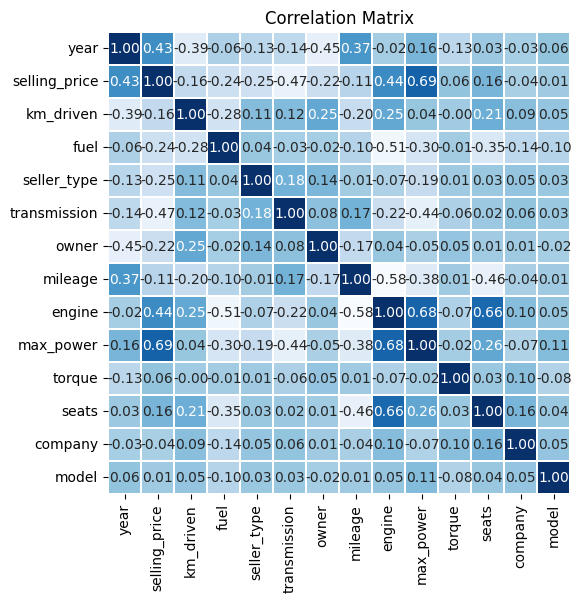

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), annot=True, cmap='Blues', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix')

In [30]:
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9','PC10','PC11'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.544439,-0.203081,-1.477731,0.421632,-0.612980,0.272953,-1.173470,0.031885,-0.060947,-0.071249,-0.063321
1,0.369579,-0.616626,-0.665925,0.912923,-0.533507,0.752396,0.212917,-0.179424,0.631290,-0.163396,-0.075896
2,0.134174,-2.967826,1.155517,-0.848915,-1.620037,0.428512,0.561966,0.265603,0.287466,0.483349,0.506076
3,-0.119559,-0.533712,-0.980120,0.717844,-0.479251,0.198966,-1.089690,-0.727634,-0.409214,0.444420,0.047942
4,-0.134902,-1.189107,0.787652,-1.704742,-0.805340,-0.346572,-1.409047,-0.777183,-0.280817,0.516789,-0.099869


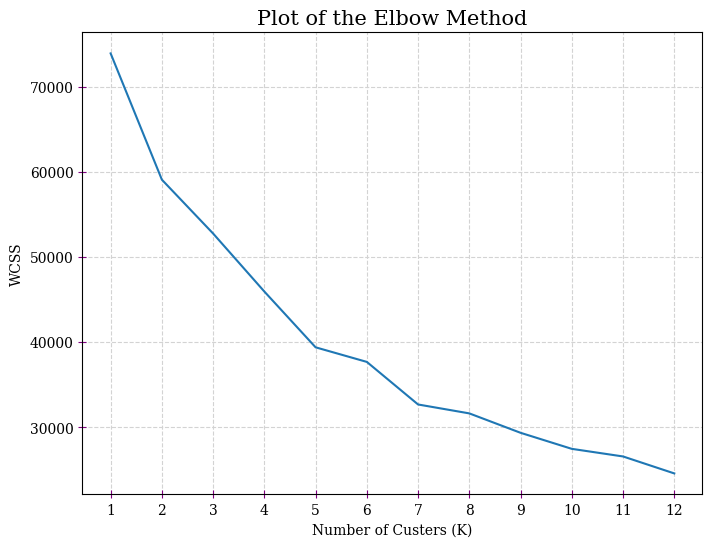

In [31]:
wcss = []

for i in range(1, 13):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 13), wcss)
plt.xticks(range(1, 13), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [32]:
kmean = KMeans(n_clusters=5, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=5, random_state=90)

In [33]:
print(kmean.labels_)

[3 3 1 ... 1 3 3]


In [34]:
pd.Series(kmean.labels_).value_counts()

,count
3,2437
1,1534
4,1347
0,965
2,434


In [35]:
df['clusters'] = kmean.labels_

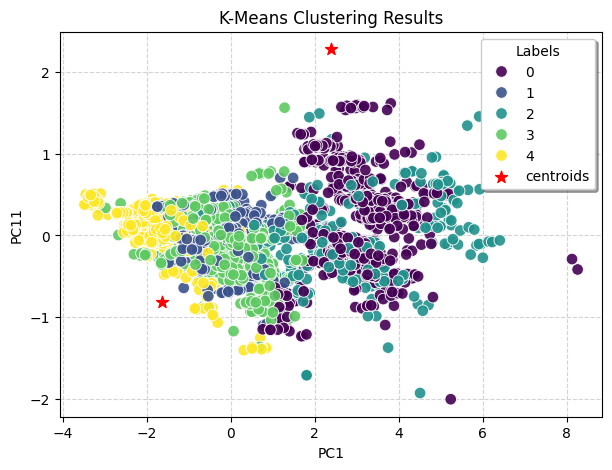

In [36]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC11', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC11')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results')
plt.show()

In [37]:
df=pd.read_csv("/content/Indian automoble buying behavour study 1.0.csv")

In [38]:
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


[32, 67]


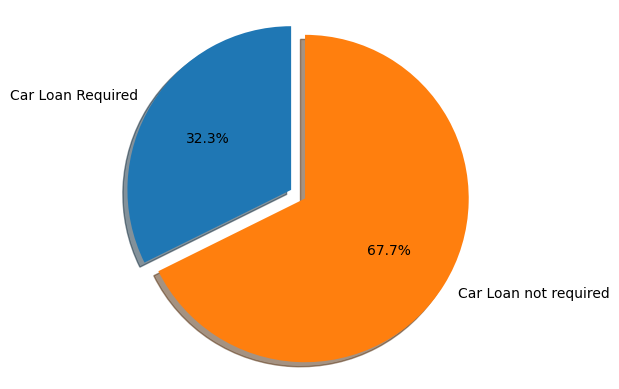

In [39]:
labels = ['Car Loan Required','Car Loan not required']
Loan_status = [df.query('Car_Loan == "Yes"').Car_Loan.count(),df.query('Car_Loan == "No"').Car_Loan.count()]
print(Loan_status)

import matplotlib.pyplot as plt

explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(Loan_status, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

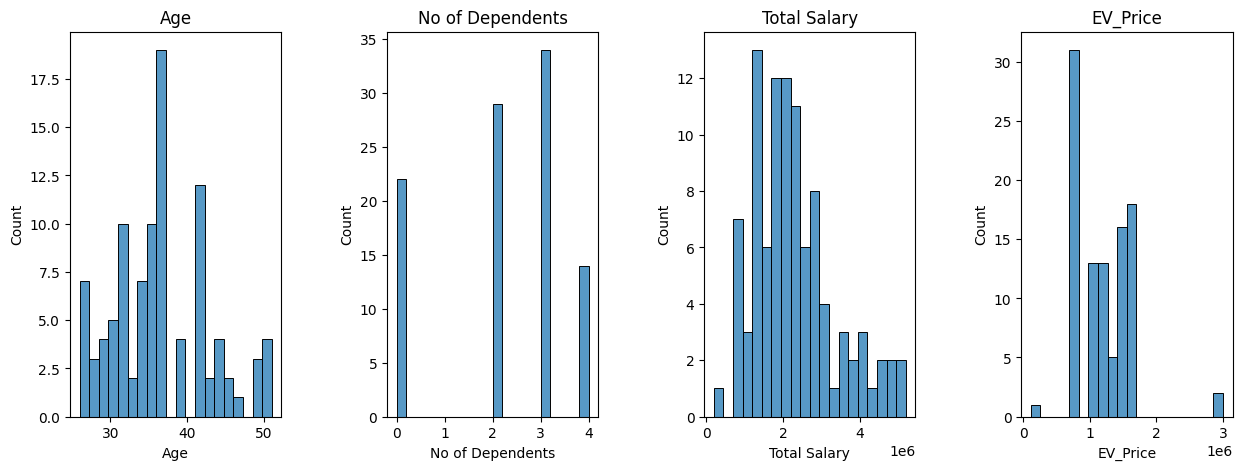

In [40]:
plt.figure(1, figsize=(15,5))
n=0
group_labels = ['Group 1', 'Group 2', 'Group 3','Group 4']
for x in ['Age', 'No of Dependents' ,'Total Salary'  ,'EV_Price']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(df[x], bins= 20)
  plt.title('{}'.format(x))
plt.show()

In [41]:
features = list(df.columns)
features

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Car_Loan',
 'House Loan',
 'Wife Working',
 'Salary',
 'Wife Salary',
 'Total Salary',
 'Make',
 'EV_Price']

In [42]:
cluster_data = df[features]
cluster_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [43]:
from sklearn.preprocessing import LabelEncoder

cols = ['Profession', 'Marrital Status', 'Education', 'Car_Loan','House Loan','Wife Working']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.drop(columns='Make',inplace=True)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,EV_Price
0,27,1,1,1,0,1,0,0,800000,0,800000,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,1600000


In [44]:
cluster_data.dtypes

,0
Age,int64
Profession,object
Marrital Status,object
Education,object
No of Dependents,int64
Car_Loan,object
House Loan,object
Wife Working,object
Salary,int64
Wife Salary,int64


In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in ['Profession', 'Marrital Status', 'Education', 'Car_Loan','House Loan','Wife Working','Make']:
    cluster_data[col] = label_encoder.fit_transform(cluster_data[col])

# Now run the clustering
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=2)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data)

# Check the result
cluster_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price,clusters
0,27,1,1,1,0,1,0,0,800000,0,800000,8,800000,1
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1,1000000,1
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4,1200000,1
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2,1200000,1
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6,1600000,1


In [46]:
cluster_data['clusters'].value_counts()

,count
clusters,
1,73
0,26


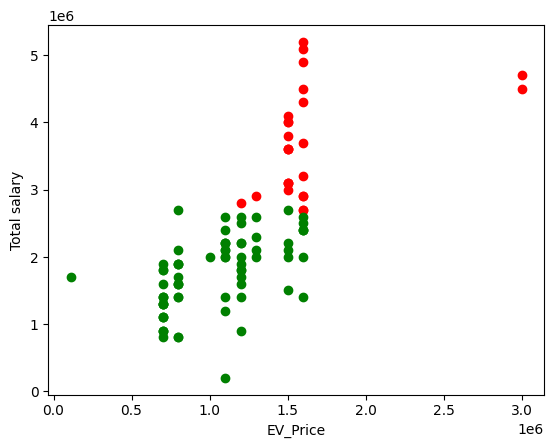

In [47]:
Cluster_0 = cluster_data[cluster_data.clusters==0]
Cluster_1 = cluster_data[cluster_data.clusters==1]

plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green')

plt.xlabel('EV_Price')
plt.ylabel('Total salary')
plt.show()

In [48]:
from sklearn.preprocessing import MinMaxScaler

x = cluster_data['Age'].values.reshape(-1, 1)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
cluster_data['Age']= x_scaled

x = cluster_data['Total Salary'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
cluster_data['Total Salary']= x_scaled

x = cluster_data['EV_Price'].values.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
cluster_data['EV_Price']= x_scaled

In [49]:
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data)
cluster_data

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price,clusters
0,0.04,1,1,1,0,1,0,0,800000,0,0.12,8,0.238754,1
1,0.36,1,0,1,2,1,1,1,1400000,600000,0.36,1,0.307958,1
2,0.76,0,0,0,4,1,1,0,1800000,0,0.32,4,0.377163,1
3,0.60,0,0,1,3,0,0,1,1600000,600000,0.40,2,0.377163,1
4,0.20,1,0,1,2,1,0,1,1800000,800000,0.48,6,0.515571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,2400000,0,0.44,6,0.515571,0
95,0.96,1,0,1,3,0,0,1,3800000,1300000,0.98,6,0.515571,0
96,1.00,0,0,0,2,1,1,0,2200000,0,0.40,1,0.342561,1
97,1.00,1,0,1,2,0,0,1,2700000,1300000,0.76,3,0.480969,0


In [50]:
clustering_kmeans = KMeans(n_clusters=3)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data)
cluster_data

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price,clusters
0,0.04,1,1,1,0,1,0,0,800000,0,0.12,8,0.238754,2
1,0.36,1,0,1,2,1,1,1,1400000,600000,0.36,1,0.307958,2
2,0.76,0,0,0,4,1,1,0,1800000,0,0.32,4,0.377163,0
3,0.60,0,0,1,3,0,0,1,1600000,600000,0.40,2,0.377163,2
4,0.20,1,0,1,2,1,0,1,1800000,800000,0.48,6,0.515571,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,2400000,0,0.44,6,0.515571,0
95,0.96,1,0,1,3,0,0,1,3800000,1300000,0.98,6,0.515571,1
96,1.00,0,0,0,2,1,1,0,2200000,0,0.40,1,0.342561,0
97,1.00,1,0,1,2,0,0,1,2700000,1300000,0.76,3,0.480969,1


In [51]:
cluster_data['clusters'].value_counts()

,count
clusters,
2,58
0,23
1,18


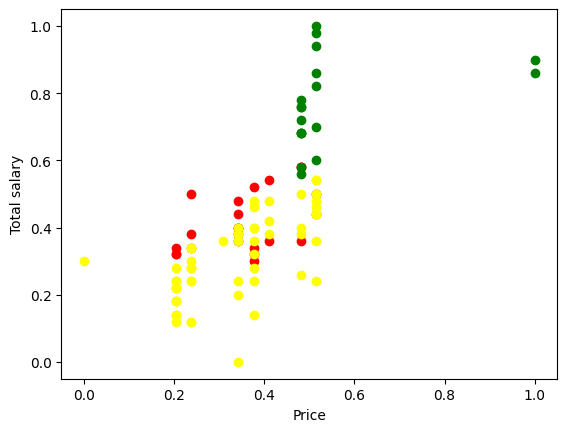

In [52]:
Cluster_0 = cluster_data[cluster_data.clusters==0]
Cluster_1 = cluster_data[cluster_data.clusters==1]
Cluster_2 = cluster_data[cluster_data.clusters==2]
plt.scatter(Cluster_0.EV_Price, Cluster_0['Total Salary'],color='red')
plt.scatter(Cluster_1.EV_Price, Cluster_1['Total Salary'],color='green')
plt.scatter(Cluster_2.EV_Price, Cluster_2['Total Salary'],color='yellow')

plt.xlabel('Price')
plt.ylabel('Total salary')
plt.show()

In [53]:
clustering_kmeans.cluster_centers_

array([[ 5.75652174e-01,  5.65217391e-01,  8.69565217e-02,
         5.65217391e-01,  2.69565217e+00,  5.21739130e-01,
         6.08695652e-01,  3.33066907e-16,  2.26521739e+06,
        -1.16415322e-10,  4.13043478e-01,  3.26086957e+00,
         3.56100496e-01,  6.08695652e-01],
       [ 6.20000000e-01,  8.33333333e-01,  2.77555756e-17,
         6.66666667e-01,  2.61111111e+00,  2.22222222e-01,
         4.44444444e-01,  1.00000000e+00,  2.54444444e+06,
         1.50555556e+06,  7.70000000e-01,  4.38888889e+00,
         5.52095348e-01,  0.00000000e+00],
       [ 2.83448276e-01,  6.20689655e-01,  2.24137931e-01,
         5.34482759e-01,  1.84482759e+00,  2.75862069e-01,
         2.58620690e-01,  6.20689655e-01,  1.27586207e+06,
         4.44827586e+05,  3.04137931e-01,  3.37931034e+00,
         3.27705524e-01,  9.65517241e-01]])

In [54]:

k_range = range(1,10)
sse = []
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(cluster_data)
  sse.append(km.inertia_)

In [55]:
sse

[80392323233460.98,
 43601477833595.95,
 30427672873391.023,
 15966702652482.504,
 13244544253004.783,
 10686155754913.816,
 7681333334230.296,
 7573857143761.727,
 5728715729644.653]

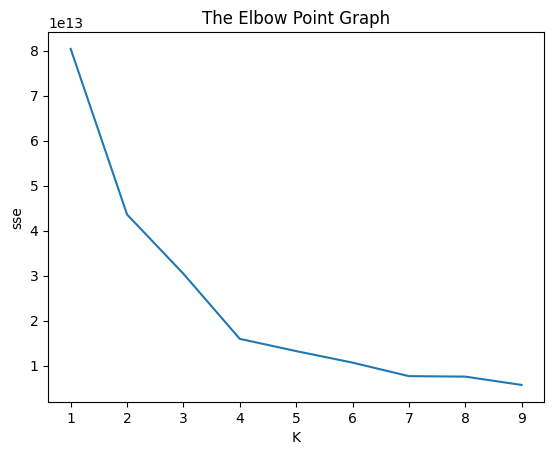

In [56]:
plt.title('The Elbow Point Graph')
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_range,sse)

In [57]:
features

['Age',
 'Profession',
 'Marrital Status',
 'Education',
 'No of Dependents',
 'Car_Loan',
 'House Loan',
 'Wife Working',
 'Salary',
 'Wife Salary',
 'Total Salary',
 'Make',
 'EV_Price']

In [58]:
clustering_kmeans = KMeans(n_clusters = 6)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data)
cluster_data

,Age,Profession,Marrital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,EV_Price,clusters
0,0.04,1,1,1,0,1,0,0,800000,0,0.12,8,0.238754,0
1,0.36,1,0,1,2,1,1,1,1400000,600000,0.36,1,0.307958,2
2,0.76,0,0,0,4,1,1,0,1800000,0,0.32,4,0.377163,0
3,0.60,0,0,1,3,0,0,1,1600000,600000,0.40,2,0.377163,2
4,0.20,1,0,1,2,1,0,1,1800000,800000,0.48,6,0.515571,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0,1,0,0,0,0,0,2400000,0,0.44,6,0.515571,3
95,0.96,1,0,1,3,0,0,1,3800000,1300000,0.98,6,0.515571,1
96,1.00,0,0,0,2,1,1,0,2200000,0,0.40,1,0.342561,3
97,1.00,1,0,1,2,0,0,1,2700000,1300000,0.76,3,0.480969,1


In [59]:
labels = clustering_kmeans.labels_
labels

array([0, 2, 0, 2, 2, 0, 5, 0, 3, 5, 2, 0, 5, 0, 5, 1, 0, 0, 0, 5, 2, 5,
       2, 5, 2, 2, 0, 0, 2, 2, 0, 2, 4, 2, 3, 4, 5, 2, 0, 2, 5, 0, 2, 2,
       0, 4, 5, 2, 5, 4, 3, 1, 3, 4, 1, 3, 3, 0, 0, 0, 0, 0, 3, 0, 2, 0,
       4, 3, 1, 0, 2, 4, 0, 2, 2, 4, 3, 2, 3, 1, 3, 1, 3, 3, 3, 0, 0, 2,
       1, 3, 0, 1, 3, 0, 3, 1, 3, 1, 3], dtype=int32)

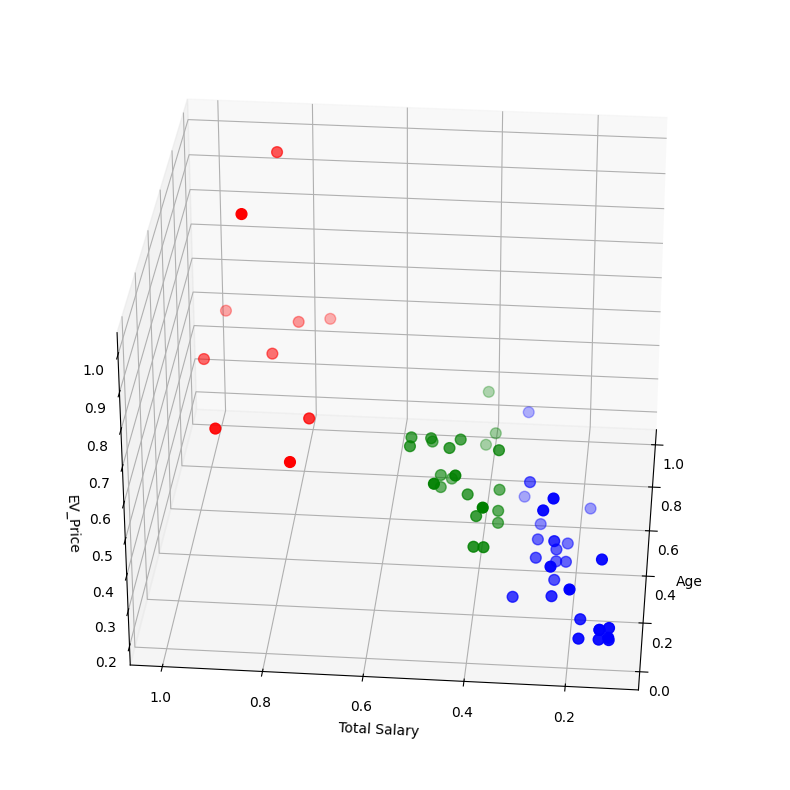

In [63]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111,projection ='3d')
ax.scatter(cluster_data.Age[labels == 0], cluster_data["Total Salary"][labels == 0], cluster_data["EV_Price"][labels == 0],  c='blue', s=60)
ax.scatter(cluster_data.Age[labels == 1], cluster_data["Total Salary"][labels == 1], cluster_data["EV_Price"][labels == 1],  c='red', s=60)
ax.scatter(cluster_data.Age[labels == 2], cluster_data["Total Salary"][labels == 2], cluster_data["EV_Price"][labels == 2],  c='green', s=60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Total Salary")
ax.set_zlabel('EV_Price')
plt.show()